# Homework exercise 1
## Deadline: upload to Moodle by 15 March 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name:__

The name of the file that you upload should be *Homework1_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 16 March to earn points for this homework exercise unless you have a valid reason for your absence.

You are expected to work on this exercise on your own. If any part of the questions is unclear, please ask on the Moodle forum.

Please note that you are expected to solve these exercises using Python packages you have encountered in class. In particular, you are expected to write your own functions rather than looking for certainly existing similar code on the web, and you may not use any packages that make available functionality that is similar to what the questions ask you to implement.

If you are not able to answer one of the earlier questions and later questions rely on the answers on the earlier ones, you are allowed to use dummy functions (which yield incorrect answers, e.g. returning random numbers instead of actually doing the required calculations) as input to your answers to later questions.

#### Building a simple portfolio

Suppose you are a portfolio manager who relies on discounted cash flow analysis of various asset you might invest in.

1. Write a function that takes a list of future cash flows and a discount rate as inputs and returns the fair value of the stream of cash flows. Test the function by computing the values of a few arbitrary example inputs.

In [114]:
#create function to discount cashflow
#I assume that the first value is in the present - therefore it wont be discounted as (1.r)**0 = 1
#If I wouldn assume that, the loop would change to: 
#for i in range(0, len(cf)):
#        discounted.append(cf[i]/((1+r)**(i+1))
#and the discounting would start at 1 and end at len(cf)
#this would also change the function in 4, as dcf_ggm wouldn't reduce to ggm if the input was only one element


def dcf(cf,r): 
    """
    Discounts cashflow 'CF' with discount rate 'r'
    it returns a list of the discounted values as well as their sum 
     """
    
    #empty list to fill with discounted values
    discounted = []
    
    #for loop to discount each value in cf
    for i in range(0, len(cf)):
        discounted.append(cf[i]/((1+r)**i)
    
    #return both, the list of discounted values and their sum
    return(discounted, sum(discounted))


In [113]:
#test function
test = [1,2,3,4,5]
r= 0.1
x = dcf(test,r)

#List of discounted values
print('List of discounted values: ' + str(x[0]))

#Sum of discounted values
print('Sum of discounted values: ' + str(x[1]))

List of discounted values: [1.0, 1.8181818181818181, 2.4793388429752063, 3.00525920360631, 3.4150672768253525]
Sum of discounted values: 11.717847141588686


In [112]:
#check by computing the loop manually (just to be sure)

1+2/(1.1) + 3/(1.1**2) + 4/(1.1**3) + 5/(1.1**4) == x[1]

True

In [115]:
#Check "help"

help(dcf)

Help on function dcf in module __main__:

dcf(cf, r)
    Discounts cashflow 'CF' with discount rate 'r'
    it returns a list of the discounted values as well as their sum



2. An alternative valuation method that relies on different inputs is the Gordon Growth Model (GGM), which requires only the initial dividend payment, the cost of equity, and the expected growth rate. Please write a function that returns the value of an asset using this model and test it with some examples. The function should return `None` and print an informative error message if the value of the asset is infinite.

In [116]:
#GGM:   
#value of the asset = initial Dividend / (cost of equity - growth rate)
#source: https://corporatefinanceinstitute.com/resources/knowledge/valuation/gordon-growth-model/

import math

def ggm(div, r, gr):
    """
    Returns the value of a given asset using the Gordon Growth Model (GGM)
    Requires the initial dividend payment 'div', the cost of equity 'r' and the expected growth rate 'gr'
    """
    
    #if r and gr are the same there would be an error, as the formula would divide by zero
    if (r-gr == 0):
        valueOfAsset = None
        print('ERROR: Division by zero!')
        
    #print an error if there is an infinite value (I assume this is what was meant in the specification)
    elif (abs(div/(r-gr)) == math.inf):
        valueOfAsset = None
        print('ERROR: value of asset is infinite!')
    else:
        valueOfAsset = div/(r-gr)
    return(valueOfAsset)


In [550]:
#Testing the function

div = 100
r = 0.2
gr = 0.02

print("Test: ")
print(ggm(div, r,gr))

Test: 
555.5555555555555


In [551]:
#Test Division by Zero

print("Test division by zero:")
print(ggm(div,1,1))

Test division by zero:
ERROR: Division by zero!
None


In [552]:
#Test Infinity:

print("Test infinity:")
print(ggm(math.inf, 0.15, 0.1))

Test infinity:
ERROR: value of asset is infinite!
None


In [120]:
#Check help
help(ggm)

Help on function ggm in module __main__:

ggm(div, r, gr)
    Returns the value of a given asset using the Gordon Growth Model (GGM)
    Requires the initial dividend payment 'div', the cost of equity 'r' and the expected growth rate 'gr'



3. Based on the functions for a fixed stream of cash flows and for the GGM, it is possible to compute the value of an asset with a list of expected cash flows for a number of years and an expected fixed growth rate afterwards. Please write a functions that implements such a calculation by making use of the previously written functions. Again show some examples demonstrating that the function works.

In [121]:
#Combination of dcf and ggm
#The formula I used, as I understood it that way, was to calculate the fair value of the last cashflow at its time 
#using ggm, assuming fixed growth in the future. Then I would discount all the cashflows, including the fair value of the
#last cashflow

def dcf_ggm(cf, r, gr):
    """
    Function to calculate the value of an asset with a list of expected cashflows 'cf' 
    and an expected growth rate 'gr' afterwards.
    
    Requires a list of cashflows 'cf', the cost of equity 'r' and the expected growth rate 'r'.
    Requires the functions 'dcf' (for discounted cash flow) and 
    'ggm' (Gordon Growth Model - for discounting the fixed growth rate).
    
    """
    
    #calculate fixed growth rate with last cash flow as initial dividend
    div = cf[-1]
    divGGM = ggm(div, r, gr)
    
    #Check for Errors in ggm function
    if (divGGM == None):
        disc = None
    
    #If there are no errors in ggm discount the cashflow
    else:
        cf[-1]=divGGM
        disc = dcf(cf, r)
    
    #return either "None" or the value of the asset
    return(disc)


In [549]:
#Testing the function
cf = [100,120,90,100,101]
r = 0.1
gr = 0.01
  
x = dcf_ggm(cf,r,gr)

print('List of discounted values: ' + str(x[0]))
print('Value of the asset: ' + str(x[1]))

List of discounted values: [100.0, 109.09090909090908, 74.38016528925618, 75.13148009015775, 766.492877687468]
Value of the asset: 1125.095432157791


In [548]:
#Check division by zero
print("Check division by zero:")
dcf_ggm(cf,1,1)

#Check infinte value of asset
print("Check infinite value of asset:")
dcf_ggm([1,2,math.inf], 1,2)

Check division by zero:
ERROR: Division by zero!
Check infinite value of asset:
ERROR: value of asset is infinite!


In [553]:
#same output if we use ggm? (because dcf assumes first input to be in the present, so it wont be discounted)
#This wouldn't work if the function assumes all cashflows to be in the future (and therefore also discounts the first value)

ggm(100,0.2,0.1) == dcf_ggm([100],0.2,0.1)[1]

True

In [125]:
#check 'help'
help(dcf_ggm)

Help on function dcf_ggm in module __main__:

dcf_ggm(cf, r, gr)
    Function to calculate the value of an asset with a list of expected cashflows 'cf' 
    and an expected growth rate 'gr' afterwards.
    
    Requires a list of cashflows 'cf', the cost of equity 'r' and the expected growth rate 'r'.
    Requires the functions 'dcf' (for discounted cash flow) and 
    'ggm' (Gordon Growth Model - for discounting the fixed growth rate).



4. Being able to value assets also allows you to decide whether an asset is over- or undervalued. Write a new function that takes the market price as an additional input and that calls, dependent on the input, one of the previously written functions. It should return the over- or undervaluation in percentage terms based on a comparison of the fair value and the current price.

In [554]:
#either cash flow and discount rate or dividend payment and cost of equity and expected growth rate as input

def O_U_Evaluation(price = None, cf = None, r = None, gr = None):
    """
    Function to determine the over- or underevaluation (as percentage) of an asset, given it's price 'price'.
    The fair value ist determined by using discounted cashflows and/or the gordon growth model.
    Depending on the input values, different approaches are used to determine the fair value of the asset.
    
    1. Discounted Cashflow 
    
    If the input of 'cf' is a list and 'price' and cost of equity 'r' are given, the fair value is
    determined by discounting the cash flow
    
    2. Discounted Cashflow with fixed growth rate
    
    If the input of 'cf' is a list and 'price', cost of equity 'r' and an expected growth rate 'gr'
    are given, the fair value is determined by assuming a fixed growth rate at the end of the cash flow (using 
    the gordon growth model) and discounting the whole cashflow.
    
    3. Gordon Growth Model
    
    If the input of 'cf' is either integer, float or a list with only one element, and 'price', cost of equity 'r' and
    a fixed growth rate are given, the fair value is determined using the Gordon Growth Model.
    
    If required input is missing the function will give an error.
    
    """
    
    #discounted cashflow if cf is a list and no growth rate is given
    
    if (type(cf) == list 
        and r != None 
        and price != None 
        and gr == None):
        
        fairValue = dcf(cf, r)[1]
        
        #get over/undervaluation as percentage
        evalu = price/fairValue*100 - 100
    
    
    #discounted cashflow with fixed growth rate if fixed growth rate is given
    
    #REMARK: If we only have one divident payment, dcf_ggm reduces to ggm so we can apply dcf_ggm in both cases
    #This only applies because I assume the first cashflow to be in the present. If the function worked differently
    #I would have to change my code here and add another elif if the cf was of type float or integer.
    
    elif ((type(cf) == list or type(cf) == float or type(cf) == int)
        and r != None
        and price != None 
        and gr != None):
        
        #Make list if cf is integer or float to apply dcf_ggm
        if(type(cf) == int or type(cf) == float):
            cf = [cf]
            
        fairValue = dcf_ggm(cf,r,gr)
        
        #Handle Errors from dcf_ggm function:
        if (fairValue != None):
            fairValue = fairValue[1]
            evalu = price/fairValue*100 - 100
        else :
            evalu = None
    
    #Handle wrong or missing input
    else:
        evalu = None
        print("wrong input or input missing")
        
        
    return evalu


In [547]:
###############################################
#Testing the function:
###############################################

#1. Discounted Cash flow:
print('Discounted Cash flow: ' + str(O_U_Evaluation(10,[1,2,3,4,5],0.1)))

#Check manually usinf dcf
print('Ceck manually: ' + str(10/dcf([1,2,3,4,5], 0.1)[1]*100 - 100 == O_U_Evaluation(10,[1,2,3,4,5],0.1)))
#returns true

#2. Discounted Cash flow and fixed growth rate:
print('Discounted Cash flow with growth rate: ' + str(O_U_Evaluation(90,[1,2,3,4,5],0.1, 0.02)))

#check manually using dcf_ggm:
print('Ceck manually: ' + str(90/dcf_ggm([1,2,3,4,5],0.1, 0.02)[1] * 100 -100 == O_U_Evaluation(90,[1,2,3,4,5],0.1, 0.02)))
#returns true

#3. GGM
print('GGM: ' + str(O_U_Evaluation(90,80,0.1, 0.02)))

#Check Manually using ggm
print('Ceck manually: ' + str(90/ggm(80, 0.1,0.02)*100 -100 == O_U_Evaluation(90,80,0.1, 0.02)))
#returns true

Discounted Cash flow: -14.660091745793025
Ceck manually: True
Discounted Cash flow with growth rate: 76.50131737393198
Ceck manually: True
GGM: -91.0
Ceck manually: True


In [544]:
###############################################
#Check errorhandling:
###############################################

#Division by zero:

print('Check division by zero:')
O_U_Evaluation(90,80,0.1, 0.1)
#gives divided by zero error
O_U_Evaluation(90,[80, 90, 100],0.1, 0.1)
#again gives divided by zero error



Check division by zero:
ERROR: Division by zero!
ERROR: Division by zero!


In [543]:
#Handling wrong or missing input:

print('Check missing input:')
#No cost of equity given:
O_U_Evaluation(90,[80, 90, 100])

#No growth rate given for GGM
O_U_Evaluation(90,90,0.1)


Check missing input:
wrong input or input missing
wrong input or input missing


In [555]:
#Check Help

help(O_U_Evaluation)

Help on function O_U_Evaluation in module __main__:

O_U_Evaluation(price=None, cf=None, r=None, gr=None)
    Function to determine the over- or underevaluation (as percentage) of an asset, given it's price 'price'.
    The fair value ist determined by using discounted cashflows and/or the gordon growth model.
    Depending on the input values, different approaches are used to determine the fair value of the asset.
    
    1. Discounted Cashflow 
    
    If the input of 'cf' is a list and 'price' and cost of equity 'r' are given, the fair value is
    determined by discounting the cash flow
    
    2. Discounted Cashflow with fixed growth rate
    
    If the input of 'cf' is a list and 'price', cost of equity 'r' and an expected growth rate 'gr'
    are given, the fair value is determined by assuming a fixed growth rate at the end of the cash flow (using 
    the gordon growth model) and discounting the whole cashflow.
    
    3. Gordon Growth Model
    
    If the input of 'cf' i

5. You are next asked to build a simple portfolio based on the measured over- and undervaluation of stocks. The idea is invest €1 million in a portfolio of undervalued stocks, and to take short positions totalling the same amount in overvalued stocks.

The code below produces some random data of stocks' future profits, long-term earnings growth, cost of capital, and price. You can change some of the parameters in case you find that all stocks turn out to over- or undervalued to assure that you have stocks suitable for long and short positions.

In [557]:
import numpy as np

np.random.seed(1234)

assets = dict()

# cost of capital between 5 and 25 percent
assets['cost_of_capital']=list(5+20*np.random.rand(1000))

# profits for some number of years
#changed
assets['profit']=list(20*np.random.rand(1000,np.random.randint(2,20))+5)

# eternal growth after the profit series above ends
#changed
assets['longtermgrowth']=list(0.1*np.random.rand(1000))

# current price
#changed
assets['price']=list(25*np.random.rand(1000)+5)



The idea is to build a portfolio where the position sizes are proportional to the mispricing. For example, if you had (only) three stocks the are undervalued, and stock A is undervalued by 10 percent whereas stocks B and C are each undervalued by 20 percent, you would invest €200000 in stock A and €400000 each in stock B and C on the long side of your portfolio. Please insert a list containing the sign and size of your positions with a new key to the `assets` dictionary.

In [562]:
#initialize empty list
evaluation = []

#REMARK: I assume here that the first item in the profit list is in the present
# If it was in the future, I would either change my functions from above or 
#add the following part in the loop (and use my original function):

#cf = list(assets['profit'][j])
#cf = cf.insert(0,0)
#and then use this cf inside the over/undervaluation function. The first value in the list would be zero, so all the other 
#profits would be in the future and consequently discounted as such.



#fill list with fair values
for j in range(0, len(assets['price'])):

    evaluation.append(O_U_Evaluation(price = assets['price'][j], 
                                     cf = list(assets['profit'][j]), 
                                     r = assets['cost_of_capital'][j], 
                                     gr =assets['longtermgrowth'][j]))


evalu = np.array(evaluation)

#initialize array with only zeros
position = np.zeros(1000)

#take all positive and all negative values
all_pos = sum(evalu[evalu >= 0])
all_neg = sum(evalu[evalu < 0])

#Overvalued positions - short
position_pos = evalu[evalu >= 0]/all_pos * -1000000

#Undervalued positions - long
position_neg = evalu[evalu < 0]/all_neg * 1000000

#check if they sum up to zero
print('Check: ' + str(sum(position_neg) + sum(position_pos)))
#some rounding error

#fill the zero array with the right positions
position[evalu >= 0] = position_pos
position[evalu < 0] = position_neg

#error due to rounding
print('Error due to rounding: ' + str(sum(position)))


#new positions key to asset dictionary
assets['positions'] = position


Check: -3.4924596548080444e-10
Error due to rounding: 1.8462742445990443e-10


6. Finally, make a scatter plot where each data point consists of the price on the X-axis and the mispricing on the Y-axis.

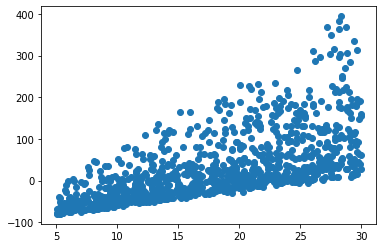

In [559]:
%matplotlib inline
import matplotlib.pyplot as plt

#mispricing is in percent 
plt.scatter(assets['price'], evaluation)